In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("dataset/shipment.csv")
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [3]:
df.shape

(6500, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [5]:
df.isna().sum()        # they have missing values in some columns

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [6]:
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [7]:
df.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

In [8]:
numeric_feature=[feature for feature in df.columns if df[feature].dtype != "O"]
categorical_feature=[feature for feature in df.columns if df[feature].dtype == "O"]

In [9]:
print("numerical feature ",len(numeric_feature),numeric_feature)
print("numerical feature ",len(categorical_feature),categorical_feature)

numerical feature  7 ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']
numerical feature  13 ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


## Univariate Analysis of numerical features

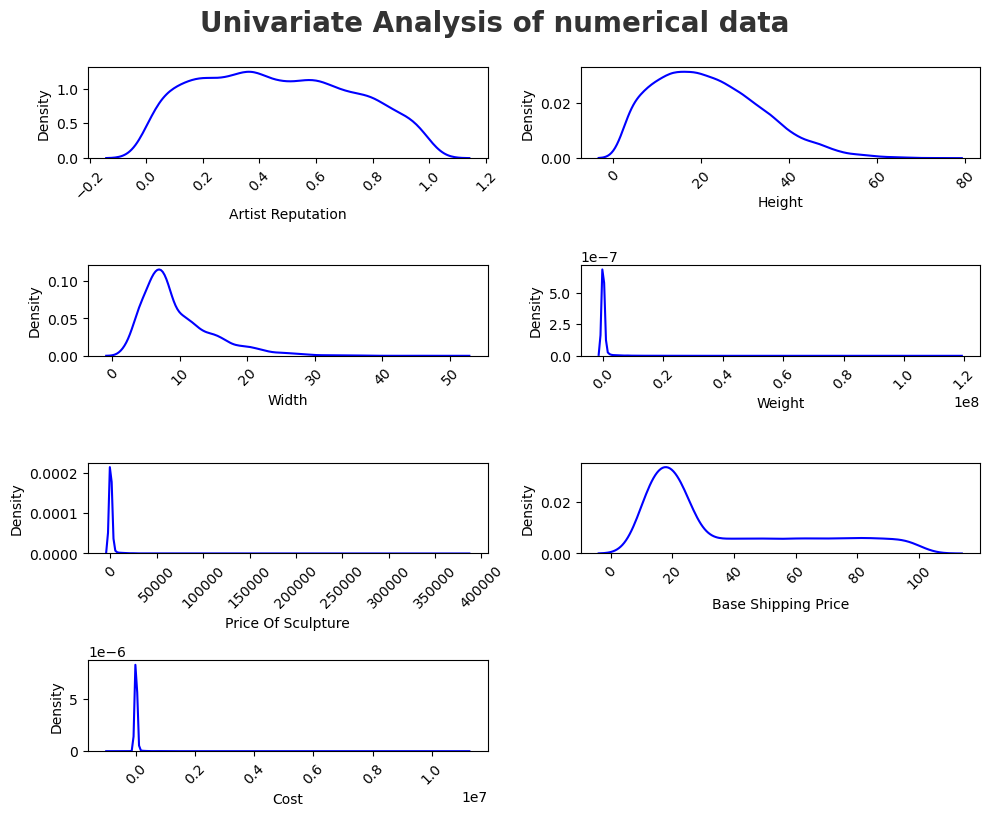

In [10]:
plt.figure(figsize=(10,8))
plt.suptitle("Univariate Analysis of numerical data" ,fontsize=20,fontweight="bold",alpha=0.8,y=1.)

for i in range(0,len(numeric_feature)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(x=df[numeric_feature[i]],color='blue')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()
    plt.xticks(rotation = 45)

## Univariate Analysis of categorical fetures

In [11]:
categorical_columns=[]
for i in categorical_feature:
    print(f"{i} :  {len(df[i].unique()) }")
    if len(df[i].unique()) < 10:
        categorical_columns.append(i)

Customer Id :  6500
Artist Name :  6449
Material :  8
International :  2
Express Shipment :  2
Installation Included :  2
Transport :  4
Fragile :  2
Customer Information :  2
Remote Location :  3
Scheduled Date :  1660
Delivery Date :  1664
Customer Location :  6500


In [12]:
categorical_columns

['Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location']

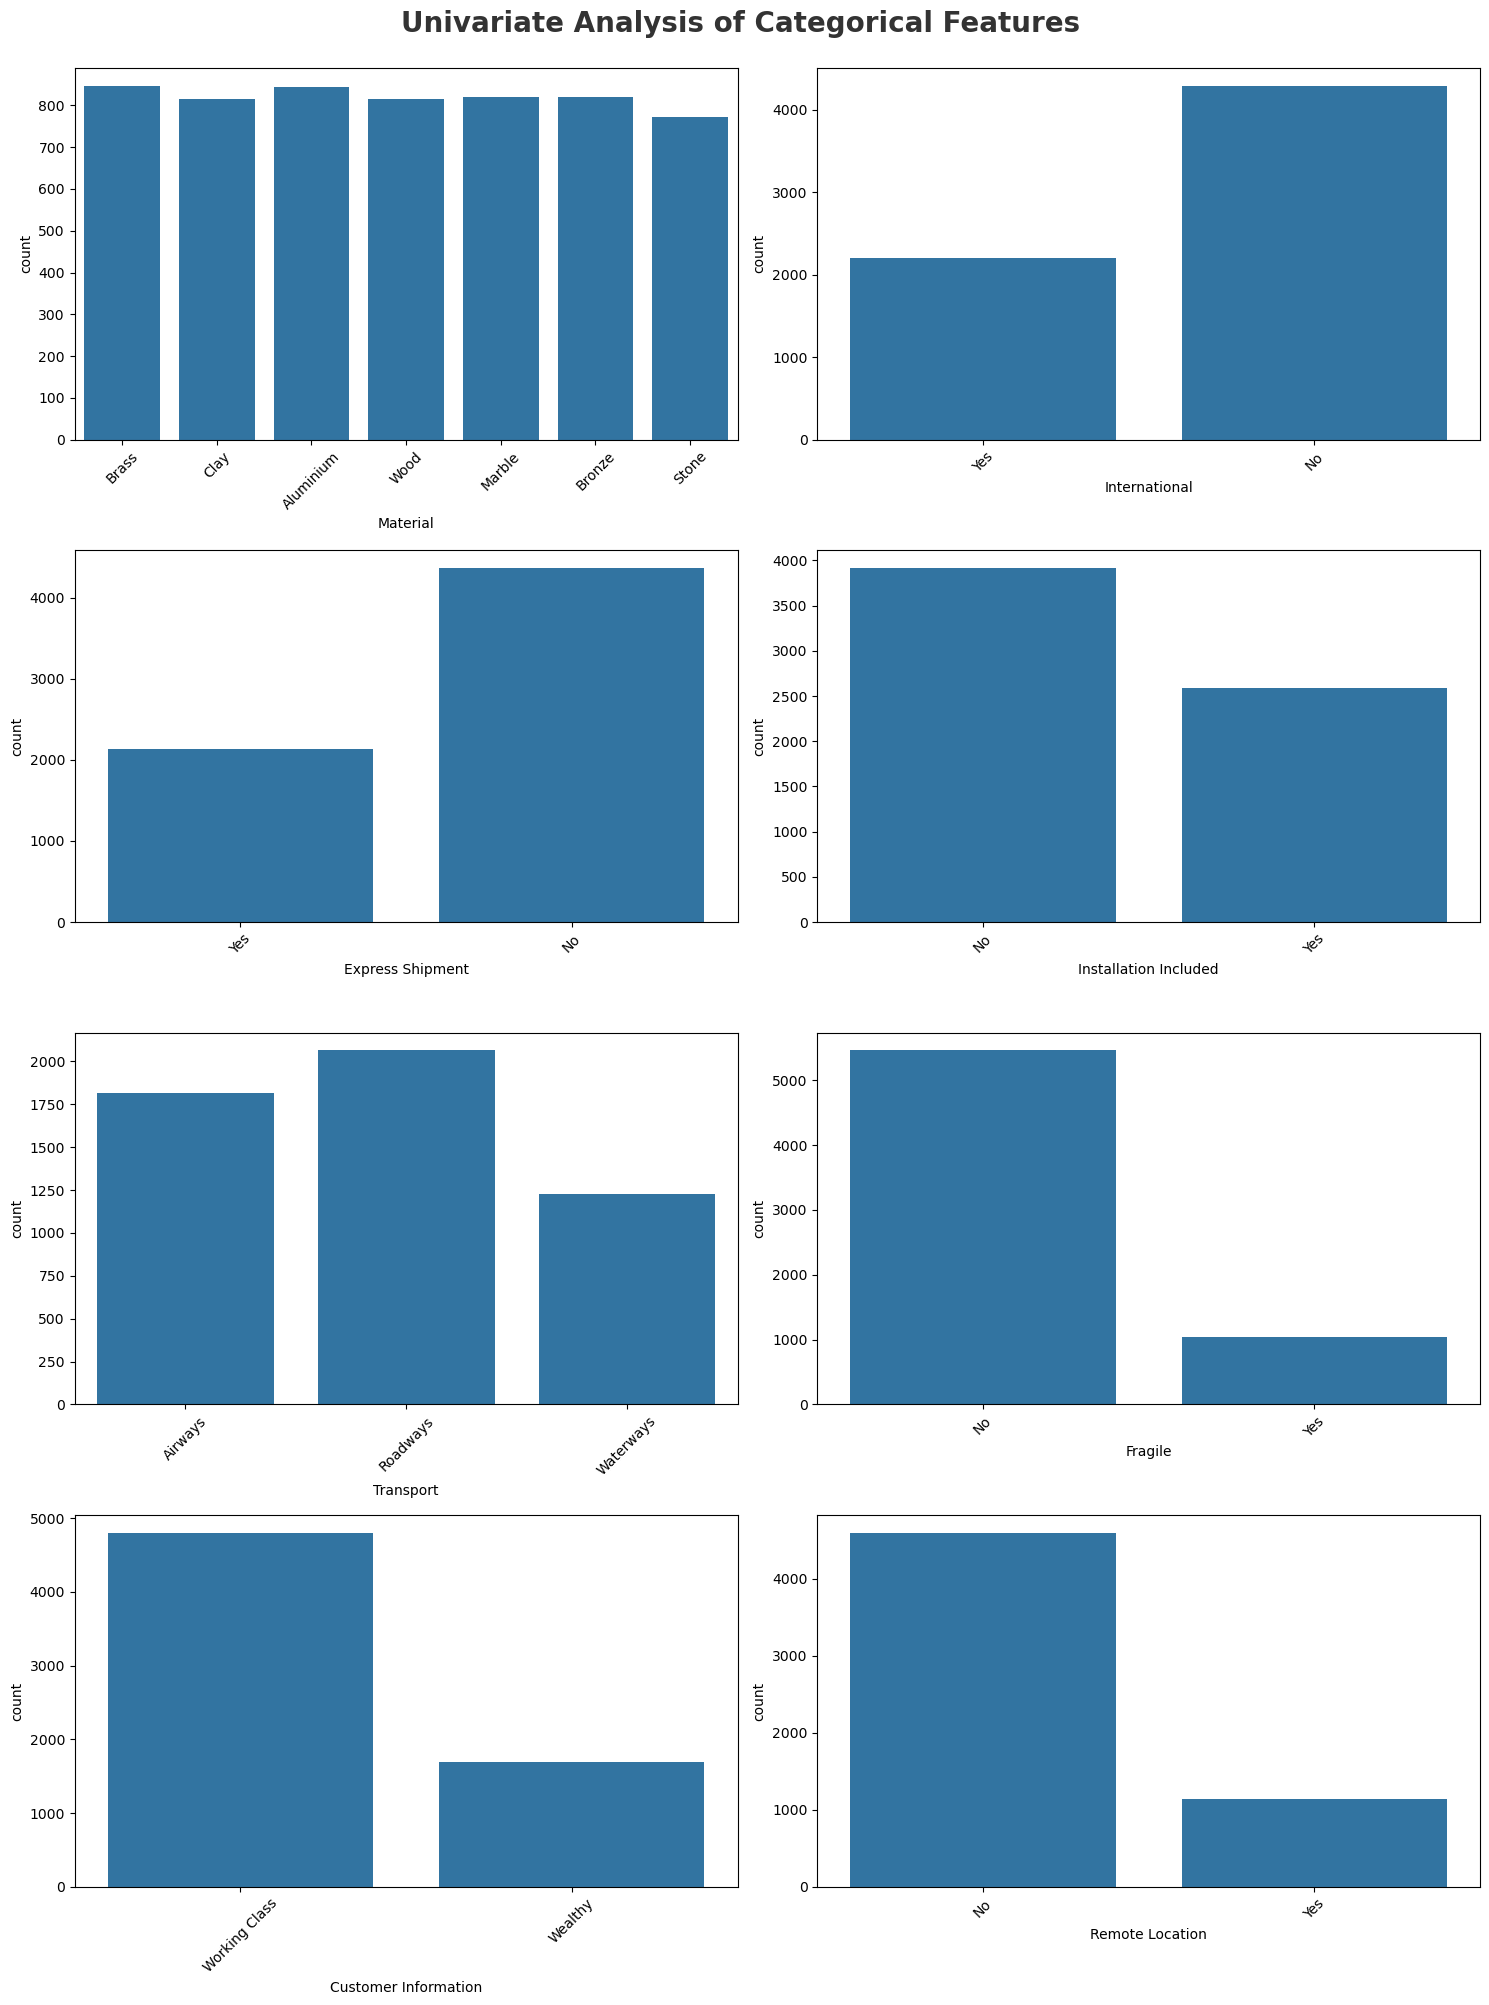

In [15]:
plt.figure(figsize=(15,20))
plt.suptitle("Univariate Analysis of Categorical Features ",fontsize=20,fontweight="bold",alpha=0.8,y=1.)
for i in range(0,len(categorical_columns)):
    plt.subplot(4,2,i+1)
    sns.countplot(x=df[categorical_columns[i]])
    plt.xlabel(categorical_columns[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [19]:
df["Cost"]=df['Cost'].abs()   # some cost value are in negatie that why covert into positive

In [22]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",159.23


## Multivariate Analysis

In [23]:
# select only numerical columns

numeric_df=df.select_dtypes(include=np.number)
numeric_df

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
0,0.26,17.0,6.0,4128.0,13.91,16.27,283.29
1,0.28,3.0,3.0,61.0,6.83,15.00,159.96
2,0.07,8.0,5.0,237.0,4.96,21.18,154.29
3,0.12,9.0,NaN,NaN,5.81,16.31,161.16
4,0.15,17.0,6.0,324.0,3.18,11.94,159.23
...,...,...,...,...,...,...,...
6495,0.37,37.0,10.0,16551.0,28.28,38.46,872.43
6496,0.67,15.0,NaN,18981.0,67.18,27.72,1347.02
6497,0.68,19.0,8.0,587.0,6.92,10.38,354.55
6498,0.02,33.0,9.0,1269377.0,2929.13,69.76,5037.50


In [24]:
numeric_df.corr()          # corelation

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Artist Reputation,1.000000,-0.000513,-0.009203,0.017113,0.054286,-0.011820,0.071991
Height,-0.000513,1.000000,0.768376,0.226543,0.200942,0.353858,0.114737
Width,-0.009203,0.768376,1.000000,0.329603,0.293544,0.332361,0.166999
Weight,0.017113,0.226543,0.329603,1.000000,0.890205,0.150856,0.438959
Price Of Sculpture,0.054286,0.200942,0.293544,0.890205,1.000000,0.134407,0.491871
Base Shipping Price,-0.011820,0.353858,0.332361,0.150856,0.134407,1.000000,0.059591
Cost,0.071991,0.114737,0.166999,0.438959,0.491871,0.059591,1.000000


<Axes: >

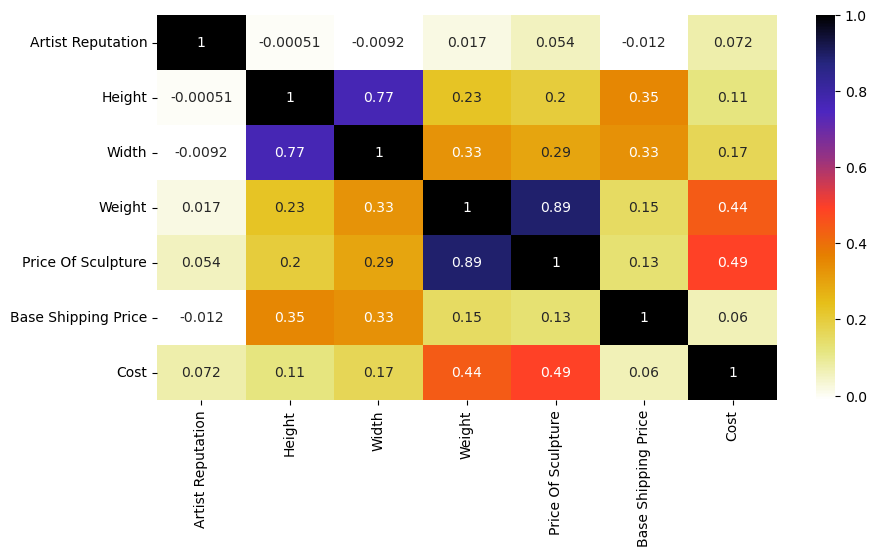

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(),annot=True,cmap="CMRmap_r")

In [34]:
numeric_feature

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Cost']

In [35]:
target_feature='Cost'

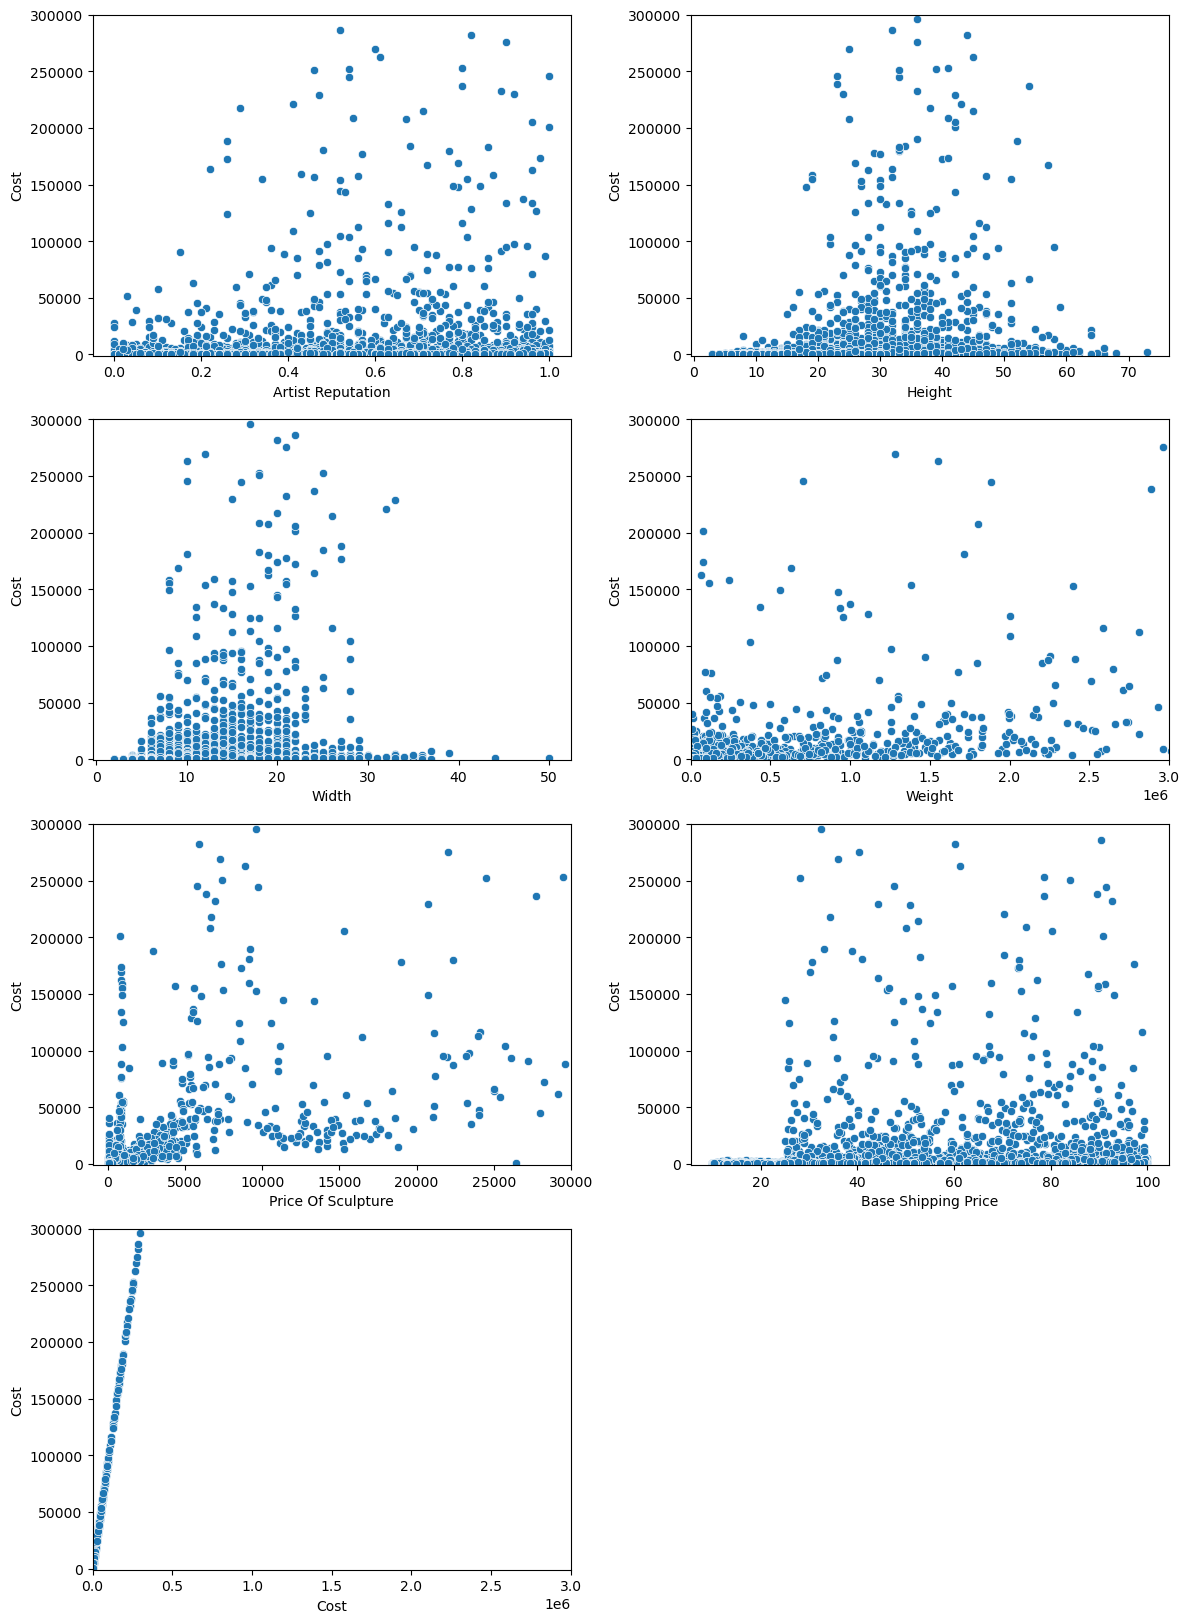

In [39]:
fig=plt.figure(figsize=(12,24))
for i in range(0,len(numeric_feature)):
    ax=plt.subplot(6,2,i+1)
    sns.scatterplot(data=df,y=target_feature,x=numeric_feature[i])
    if df[numeric_feature[i]].max() > 30000:
        plt.xlim(-1000,30000)
    if df[numeric_feature[i]].max() > 3000000:
        plt.xlim(-1000,3000000)
    plt.ylim(-1000,300000)
    plt.tight_layout()

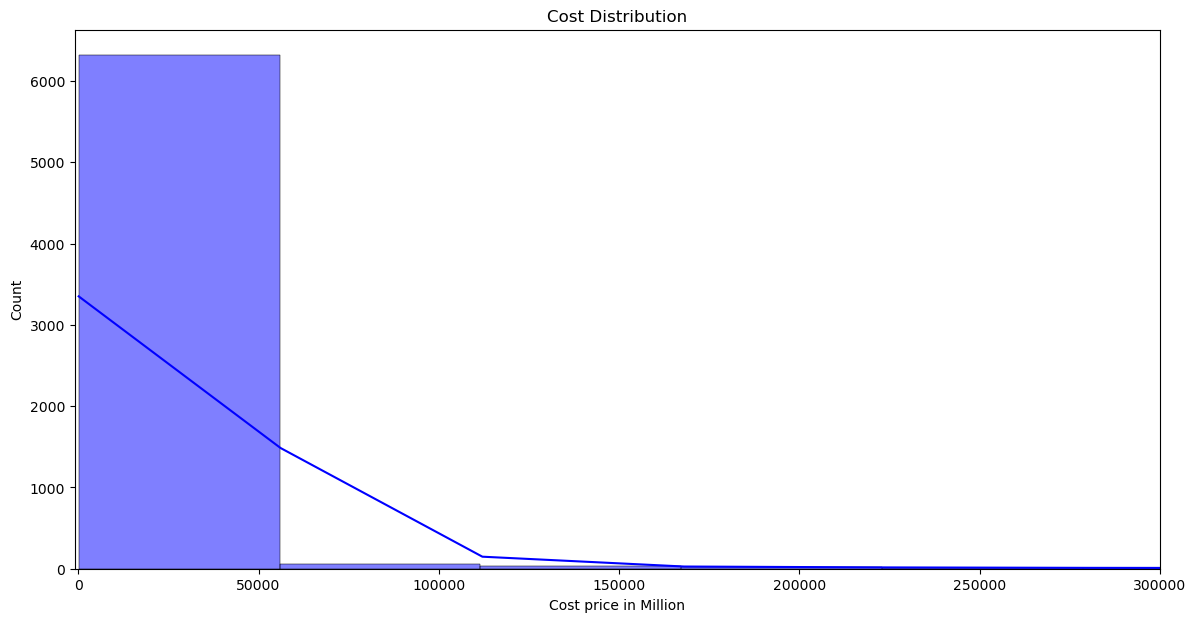

In [42]:
plt.subplots(figsize=(14,7))
sns.histplot(df[target_feature],bins=200,kde=True,color="b")
plt.title("Cost Distribution")
plt.xlim(-1000,300000)
plt.xlabel("Cost price in Million")
plt.ylabel("Count")
plt.show()

(-50000.0, 300000.0)

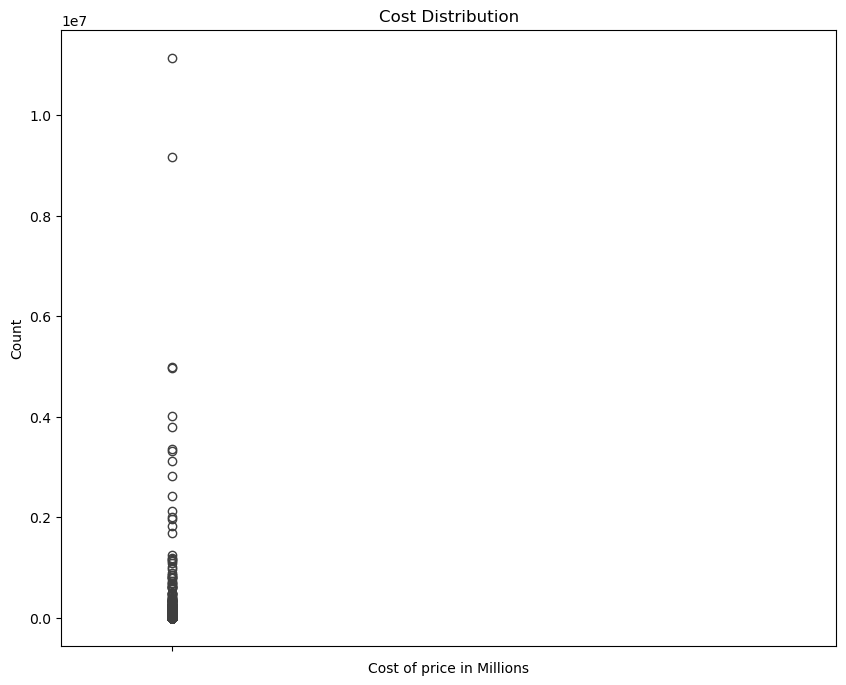

In [44]:
plt.figure(figsize=(10,8))
sns.boxplot(df[target_feature])
plt.title("Cost Distribution")
plt.xlabel("Cost of price in Millions")
plt.ylabel("Count")
plt.xlim(-50000,300000)

In [45]:
# insight  --> cost have outlier

In [61]:
international=df.groupby("International")[target_feature].median()
international

International
No     437.220
Yes    484.365
Name: Cost, dtype: float64

In [63]:
international.to_frame()

,Cost
International,
No,437.220
Yes,484.365


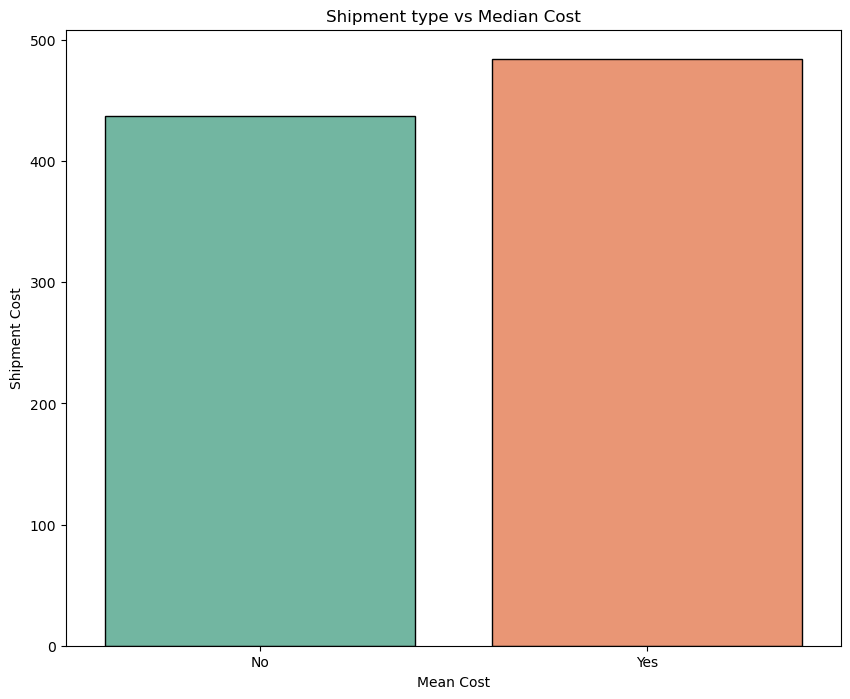

In [64]:
plt.figure(figsize=(10,8))
sns.barplot(x=international.index,y=international.values,ec="black",palette="Set2")
plt.title("Shipment type vs Median Cost")
plt.xlabel("Mean Cost")
plt.ylabel("Shipment Cost")
plt.show

In [67]:
df["International"].value_counts()

International
No     4294
Yes    2206
Name: count, dtype: int64

In [69]:
international_shipment_median=df[df['International']=="Yes"]["Cost"].median()
domestic_shipment_median=df[df["International"]=="No"]["Cost"].median()

print("different between the median price of internation and domestic is :",international_shipment_median-domestic_shipment_median)

different between the median price of internation and domestic is : 47.14499999999998


In [72]:
express_ship=df.groupby("Express Shipment")[target_feature].median()
express_ship

Express Shipment
No     422.45
Yes    511.09
Name: Cost, dtype: float64

In [73]:
express_ship.to_frame()

,Cost
Express Shipment,
No,422.45
Yes,511.09


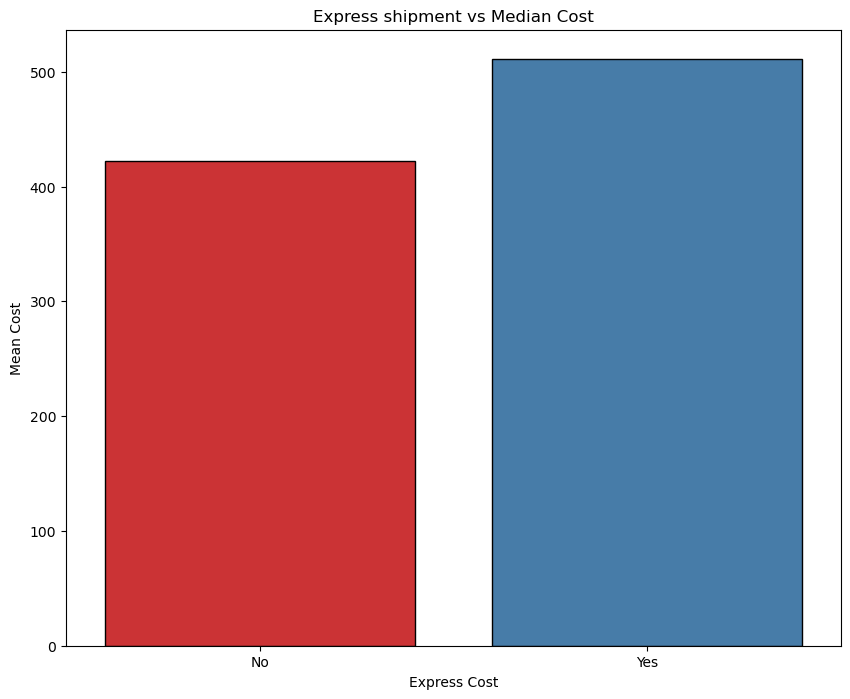

In [75]:
plt.figure(figsize=(10,8))
sns.barplot(x=express_ship.index,y=express_ship.values,ec='black',palette="Set1")
plt.title("Express shipment vs Median Cost")
plt.xlabel("Express Cost")
plt.ylabel("Mean Cost")
plt.show()

In [76]:
df["Express Shipment"].value_counts()

Express Shipment
No     4365
Yes    2135
Name: count, dtype: int64

In [78]:
express_ship_median=df[df["Express Shipment"]=="Yes"]['Cost'].median()
noramal_ship_median=df[df["Express Shipment"]=="No"]['Cost'].median()
print("The different between the median shipment price of express Shipment and Noraml shipment",express_ship_median-noramal_ship_median)

The different between the median shipment price of express Shipment and Noraml shipment 88.63999999999999


In [81]:
Installation =df.groupby("Installation Included")[target_feature].median()
Installation

Installation Included
No     435.30
Yes    492.86
Name: Cost, dtype: float64

In [82]:
Installation.to_frame()

,Cost
Installation Included,
No,435.30
Yes,492.86


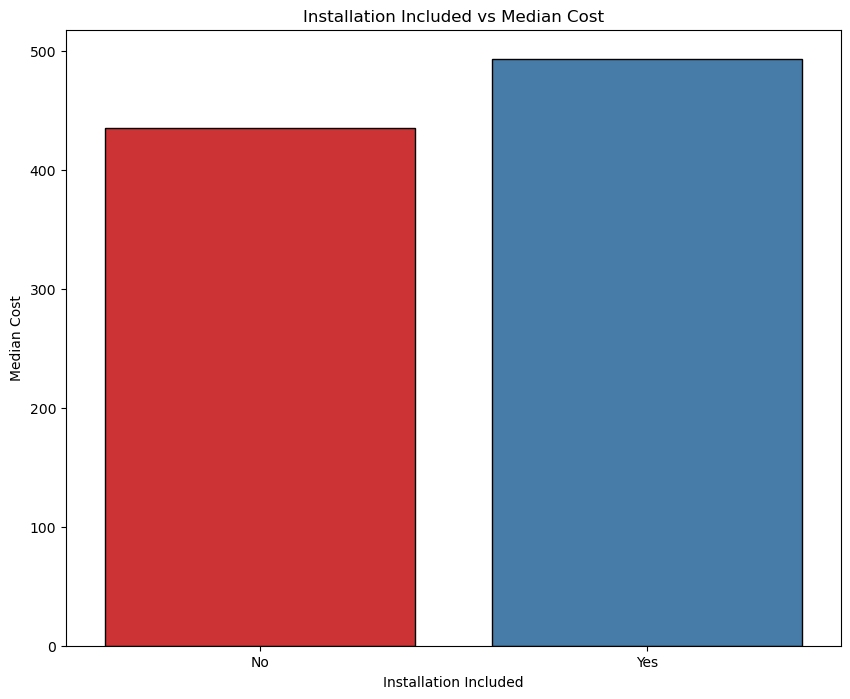

In [83]:
plt.figure(figsize=(10,8))
sns.barplot(x=Installation.index,y=Installation.values,ec="black",palette="Set1")
plt.title("Installation Included vs Median Cost")
plt.ylabel("Median Cost")
plt.xlabel("Installation Included")
plt.show()

In [87]:
remote_location_median=df[df["Remote Location"]=="Yes"]['Cost'].median()
not_remote_location_median=df[df["Remote Location"]=="No"]['Cost'].median()
print("The different between the median shipment price of remote location and not remote location",remote_location_median,not_remote_location_median)

The different between the median shipment price of remote location and not remote location 483.53 453.49


In [88]:
Installation =df.groupby("Remote Location")[target_feature].median()
print(Installation)

Installation.to_frame()

Remote Location
No     453.49
Yes    483.53
Name: Cost, dtype: float64


,Cost
Remote Location,
No,453.49
Yes,483.53


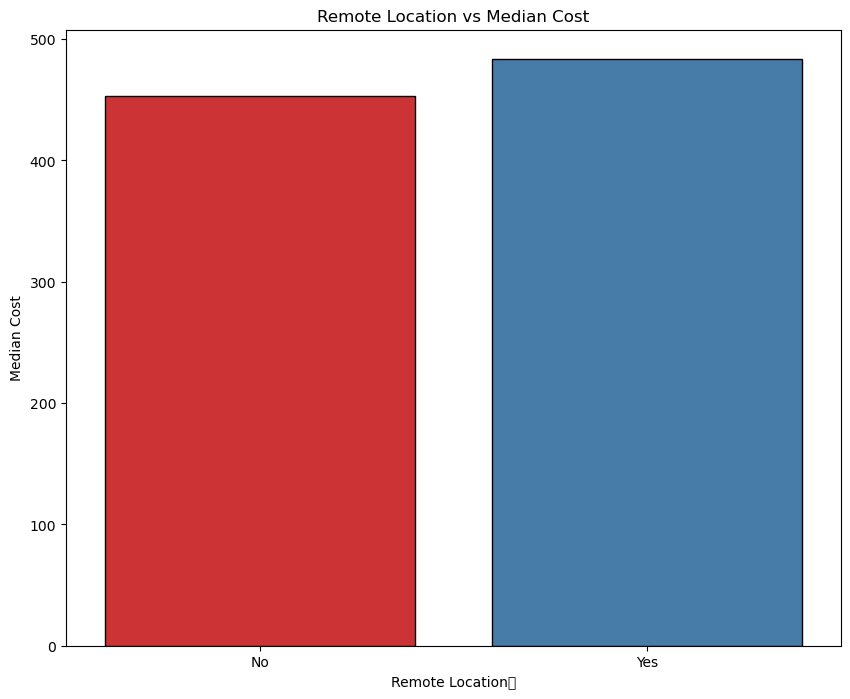

In [89]:
plt.figure(figsize=(10,8))
sns.barplot(x=Installation.index,y=Installation.values,ec="black",palette="Set1")
plt.title("Remote Location vs Median Cost")
plt.ylabel("Median Cost")
plt.xlabel("Remote Location	")
plt.show()

In [91]:
Installation =df.groupby("Customer Information")[target_feature].median()
print(Installation)

Installation.to_frame()

Customer Information
Wealthy          495.99
Working Class    442.20
Name: Cost, dtype: float64


,Cost
Customer Information,
Wealthy,495.99
Working Class,442.20


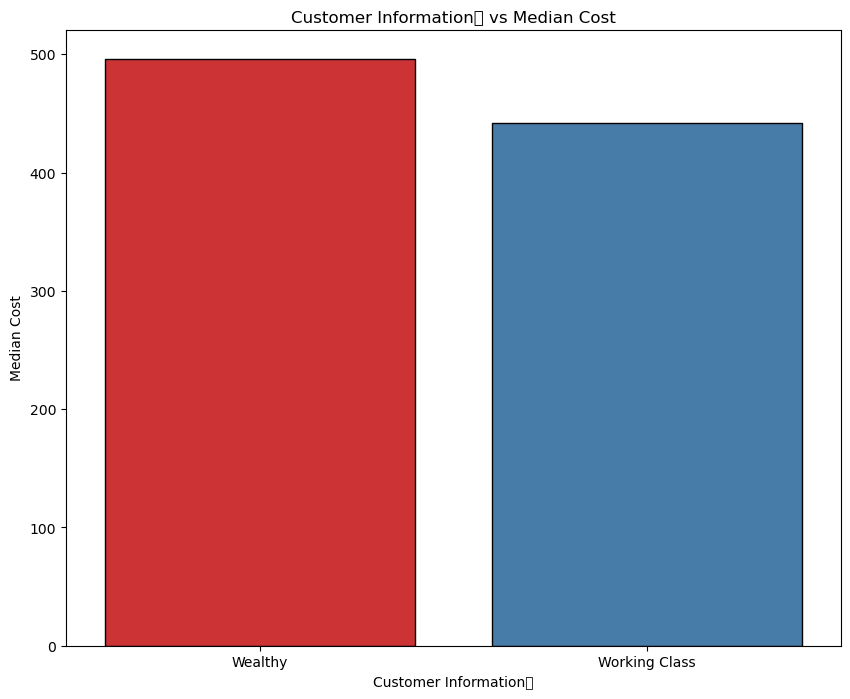

In [92]:
plt.figure(figsize=(10,8))
sns.barplot(x=Installation.index,y=Installation.values,ec="black",palette="Set1")
plt.title("Customer Information	 vs Median Cost")
plt.ylabel("Median Cost")
plt.xlabel("Customer Information	")
plt.show()

In [96]:
wealthy_median=df[df["Customer Information"]=="Wealthy"]['Cost'].median()
Working_Class_median=df[df["Customer Information"]=="Working Class"]['Cost'].median()
print("The different between the median shipment price of wealthy and working class",wealthy_median-Working_Class_median)

The different between the median shipment price of wealthy and working class 53.79000000000002


In [97]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",159.23


In [98]:
df.dtypes   # date are in object

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

In [99]:
df["Scheduled Date"]=pd.to_datetime(df["Scheduled Date"])
df["Delivery Date"]=pd.to_datetime(df["Delivery Date"])

In [100]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",159.23


In [101]:
df['Delivery Date'].dtype

dtype('<M8[ns]')

In [102]:
df['Scheduled Date'].dtype

dtype('<M8[ns]')

In [108]:
df['year']=pd.DatetimeIndex(df['Scheduled Date']).year
df['month']=pd.DatetimeIndex(df['Scheduled Date']).month

In [110]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,year,month
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,...,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",283.29,2015,6
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,...,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",159.96,2017,3
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,...,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",154.29,2015,3
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,...,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",161.16,2015,5
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,...,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",159.23,2016,12


In [111]:
x=df.groupby(["year","month"])["Cost"].mean()
x

year  month
2015  1          2053.048800
      2         34377.345000
      3         23952.461926
      4         94906.846034
      5         16724.825500
      6          7590.896916
      7          2270.111905
      8         18794.436000
      9          5559.294194
      10         5121.943131
      11        53628.157000
      12        40139.098962
2016  1         12995.124775
      2         10076.009636
      3         10852.203429
      4          5427.128174
      5          4206.195586
      6         15963.755979
      7          5614.431752
      8         10217.218678
      9         20096.879821
      10        21561.719000
      11        13864.754667
      12         2859.432276
2017  1         22083.677721
      2          4379.685102
      3         41940.158881
      4         28059.725806
      5         13864.754274
      6        123149.882000
      7         37961.125234
      8         12257.803482
      9          6634.911058
      10        10535.064609
  

In [115]:
df_wide=x.unstack()
df_wide.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,2053.048800,34377.345000,23952.461926,94906.846034,16724.825500,7590.896916,2270.111905,18794.436000,5559.294194,5121.943131,53628.157000,40139.098962
2016,12995.124775,10076.009636,10852.203429,5427.128174,4206.195586,15963.755979,5614.431752,10217.218678,20096.879821,21561.719000,13864.754667,2859.432276
2017,22083.677721,4379.685102,41940.158881,28059.725806,13864.754274,123149.882000,37961.125234,12257.803482,6634.911058,10535.064609,50718.269091,8014.642712
2018,47649.295370,6732.662525,20623.359504,4846.126392,17827.414622,6723.282883,11315.132193,6442.494915,32708.215210,24339.232500,5540.592985,5714.922348
2019,2518.749307,4083.460926,2989.961495,8942.566116,16871.824222,8862.773396,9758.057857,6006.702553,NaN,NaN,NaN,NaN


In [116]:
df_wide=x.unstack().T
df_wide.head()

year,2015,2016,2017,2018,2019
month,,,,,
1,2053.048800,12995.124775,22083.677721,47649.295370,2518.749307
2,34377.345000,10076.009636,4379.685102,6732.662525,4083.460926
3,23952.461926,10852.203429,41940.158881,20623.359504,2989.961495
4,94906.846034,5427.128174,28059.725806,4846.126392,8942.566116
5,16724.825500,4206.195586,13864.754274,17827.414622,16871.824222


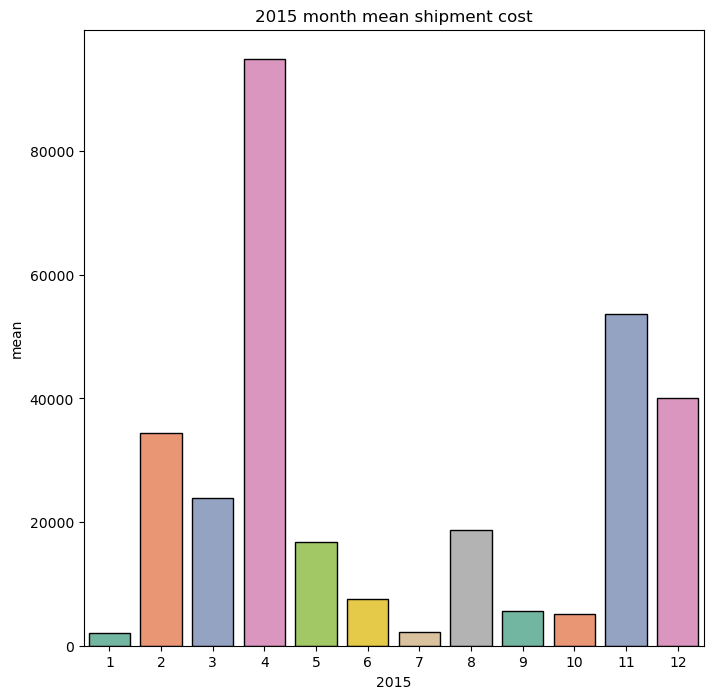

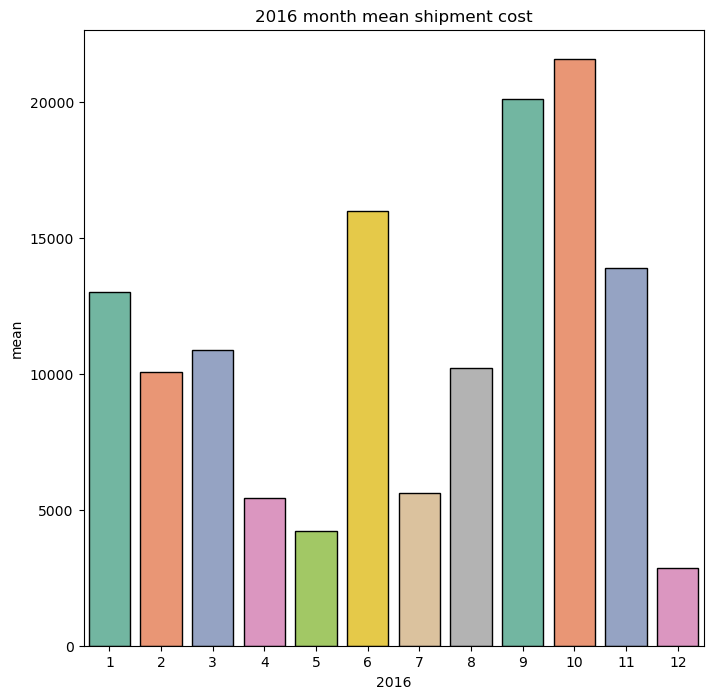

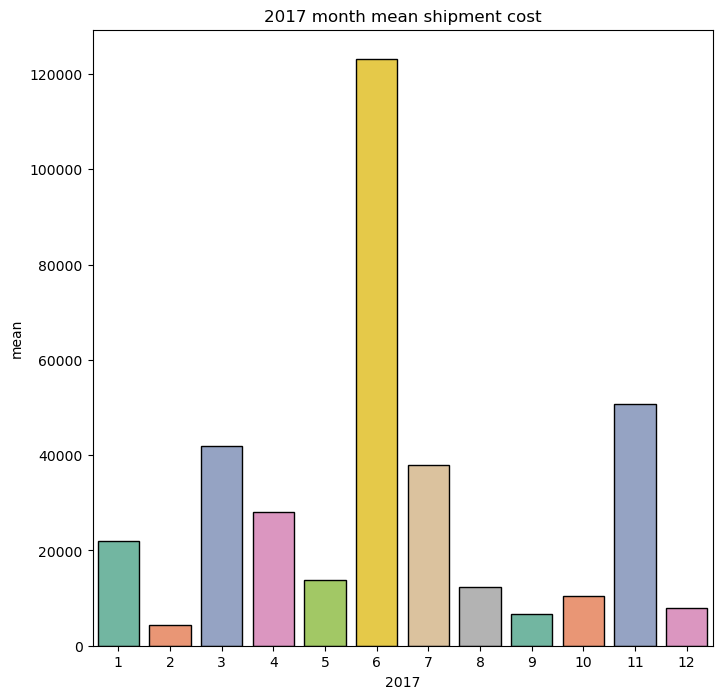

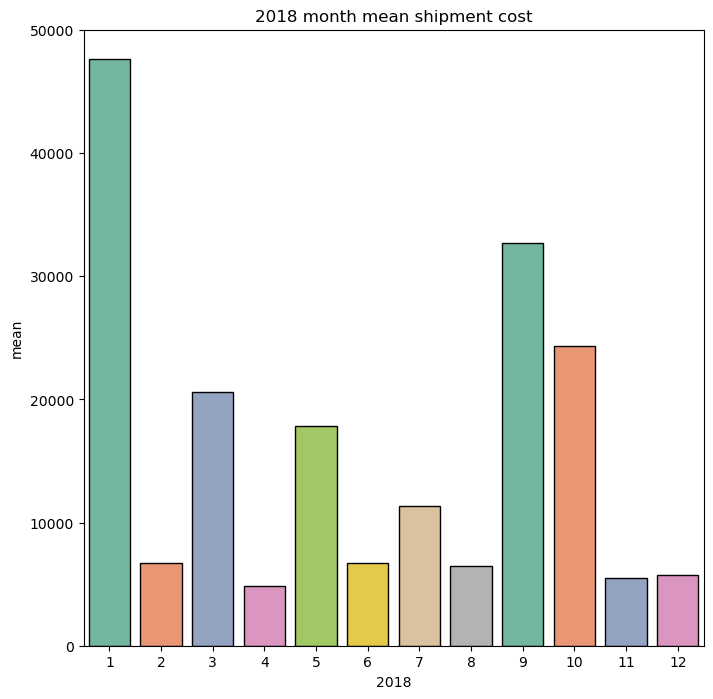

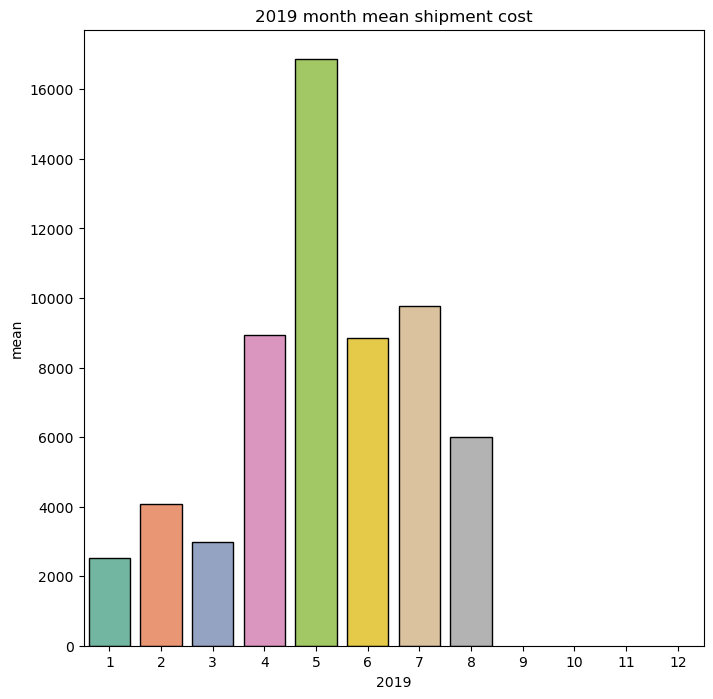

In [121]:
for i in df_wide.columns:
    plt.figure(figsize=(8,8))
    sns.barplot(y=df_wide[i],x=df_wide.index,ec="black",palette='Set2')
    plt.title(f"{i} month mean shipment cost")
    plt.ylabel("mean")
    plt.xlabel(i)
    plt.show()

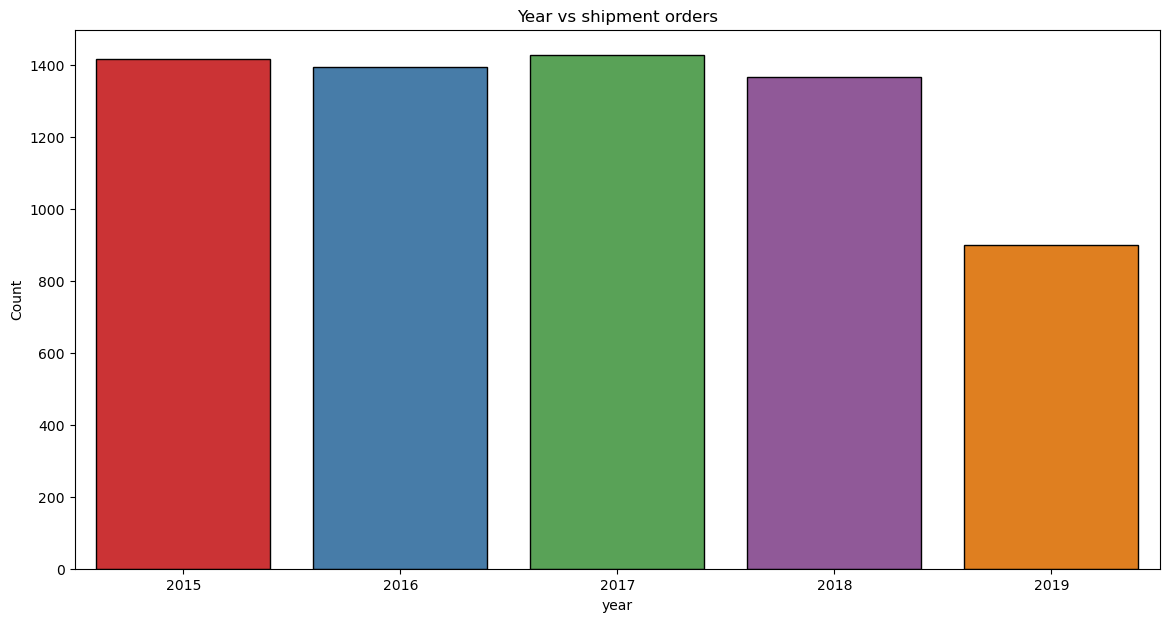

In [125]:
plt.figure(figsize=(14,7))
sns.countplot(x=df.year,ec="black",palette="Set1")
plt.title("Year vs shipment orders")
plt.ylabel("Count")
plt.xlabel("year")
plt.show()

In [127]:
# insight :


# The Cost column is target to predict
# The target variable here is continuous
# There are outlier in some columns we have to remove outlier
# Date column should be configured to extract year and month
# Null values in some columns we need to handle
